# IMPORT LIBRARIES AND DATASET

In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)

In [154]:
# Read the csv file
admission_df = pd.read_csv('Admission_Predict.csv')
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [155]:
# Drop Serial No. column
admission_df.drop('Serial No.', axis = 1, inplace = True)

In [156]:
admission_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


# PERFORM EXPLORATORY DATA ANALYSIS

In [157]:
# Check for null values
admission_df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [158]:
# Check for dataframe information
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [159]:
# Statistical summary of the dataframe
admission_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [160]:
# Grouping by university ranking
df_university = admission_df.groupby(by = 'University Rating').mean()
df_university

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


# PERFORM DATA VISUALIZATION

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DC9906FE48>,
      dtype=object)

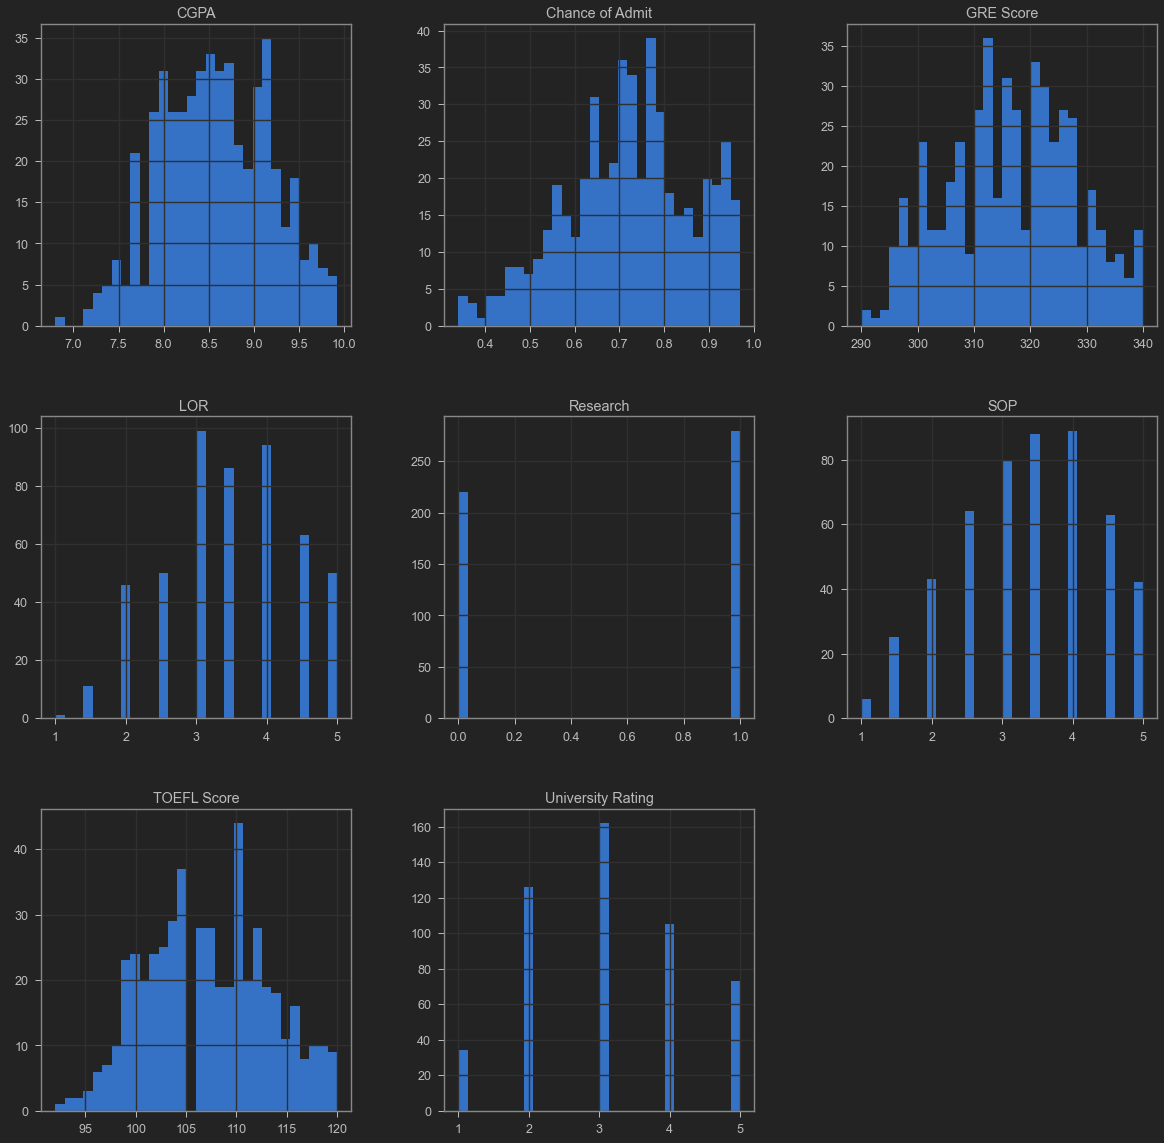

In [161]:
# Histogram of every column
admission_df.hist(bins = 30, figsize = (20, 20))

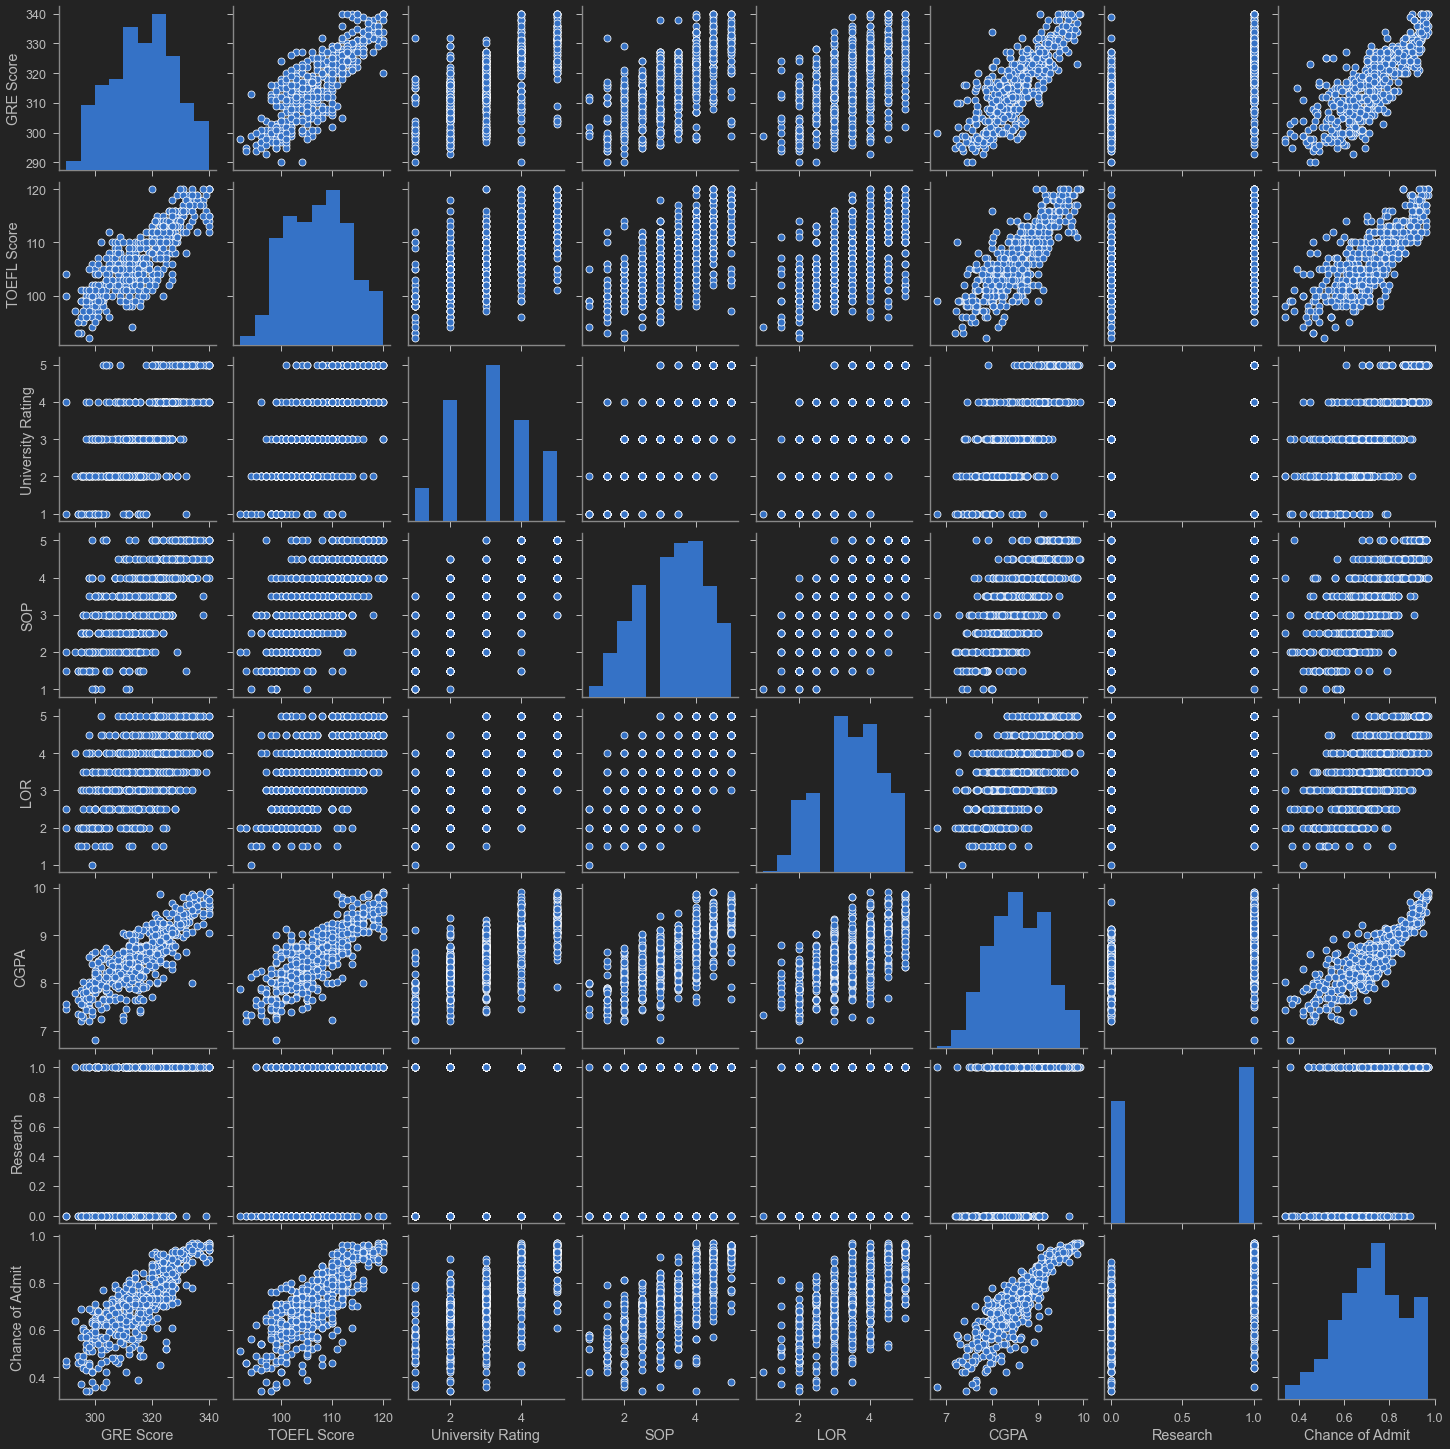

In [162]:
# Seaborn pairplot (every column against every other column)
sns.pairplot(admission_df)

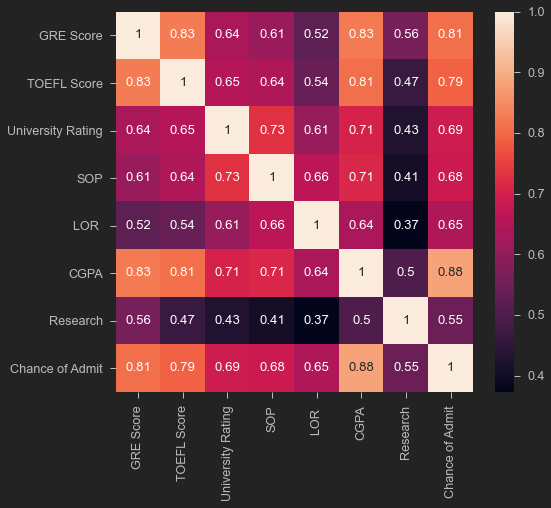

In [163]:
# Co-relational matrix heatmap
sns.heatmap(admission_df.corr(), annot = True)

# TRAINING AND TESTING DATASET

In [164]:
# Check columns
admission_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [165]:
# Differentiate independent and dependent variables
x = admission_df.drop('Chance of Admit', axis = 1)
y = admission_df[['Chance of Admit']]

In [166]:
# check for dimentions
y.shape

(500, 1)

In [167]:
# Create/Convert to NumPy Array
x = np.array(x)
y = np.array(y)

In [168]:
# scale my data (remove partiality)
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaler_y = StandardScaler()

x = scaler_x.fit_transform(x)
y = scaler_y.fit_transform(y)

In [169]:
# Splitting the data into testing and training set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15)

# TRAIN AND EVALUATE LINEAR REGRESSION MODEL

In [170]:
# Import libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [171]:
# Train regression model
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(x_train, y_train)

LinearRegression()

In [172]:
# Check accuracy of regression model
accuracy_LinearRegression = LinearRegression_model.score(x_test, y_test)
accuracy_LinearRegression

0.8171136993579111

# TRAINING AND EVALUATE AN ARTIFICIAL NEURAL NETWORK

In [173]:
# Import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [174]:
# Building Artificial Neural Network
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 7))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 50)                400       
_________________________________________________________________
activation_8 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 150)               7650      
_________________________________________________________________
activation_9 (Activation)    (None, 150)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 150)               22650     
_________________________________________________________________
activation_10 (Activation)   (None, 150)              

In [175]:
# Compile the model
ANN_model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [176]:
# Train the network
epochs_hist = ANN_model.fit(x_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2)

Epoch 1/100
17/17 [==============================] - 0s 13ms/step - loss: 0.5725 - val_loss: 0.2288
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 0.3473 - val_loss: 0.2469
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 0.3283 - val_loss: 0.2104
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 0.3268 - val_loss: 0.2159
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 0.2742 - val_loss: 0.1718
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 0.2715 - val_loss: 0.1843
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 0.2660 - val_loss: 0.1922
Epoch 8/100
17/17 [==============================] - 0s 4ms/step - loss: 0.2455 - val_loss: 0.1836
Epoch 9/100
17/17 [==============================] - 0s 4ms/step - loss: 0.2230 - val_loss: 0.1846
Epoch 10/100
17/17 [==============================] - 0s 4ms/step - loss: 0.2264 - val_loss: 0.2047
Epoch 11

17/17 [==============================] - 0s 4ms/step - loss: 0.1169 - val_loss: 0.1907
Epoch 84/100
17/17 [==============================] - 0s 3ms/step - loss: 0.1143 - val_loss: 0.2081
Epoch 85/100
17/17 [==============================] - 0s 3ms/step - loss: 0.1133 - val_loss: 0.1982
Epoch 86/100
17/17 [==============================] - 0s 3ms/step - loss: 0.1169 - val_loss: 0.2174
Epoch 87/100
17/17 [==============================] - 0s 4ms/step - loss: 0.1021 - val_loss: 0.2310
Epoch 88/100
17/17 [==============================] - 0s 4ms/step - loss: 0.1036 - val_loss: 0.1998
Epoch 89/100
17/17 [==============================] - 0s 4ms/step - loss: 0.0966 - val_loss: 0.2201
Epoch 90/100
17/17 [==============================] - 0s 4ms/step - loss: 0.1327 - val_loss: 0.2166
Epoch 91/100
17/17 [==============================] - 0s 4ms/step - loss: 0.1038 - val_loss: 0.2148
Epoch 92/100
17/17 [==============================] - 0s 4ms/step - loss: 0.1123 - val_loss: 0.2321
Epoch 93/100


In [177]:
# Check the accuracy
result = ANN_model.evaluate(x_test, y_test)
accuracy_ANN = 1 - result
accuracy_ANN

3/3 [==============================] - 0s 3ms/step - loss: 0.2594


0.740573525428772

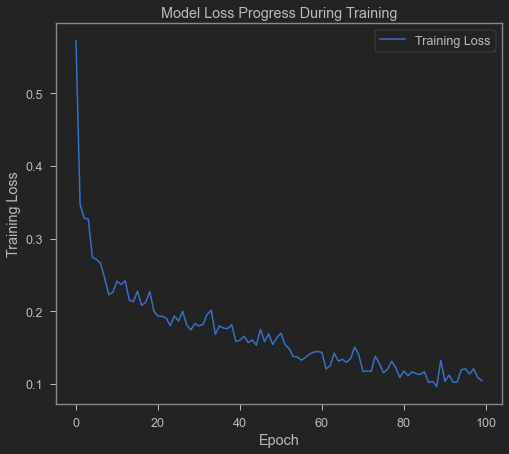

In [178]:
# Error histogram
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

# TRAIN AND EVALUATE A DECISION TREE AND RANDOM FOREST MODELS

In [179]:
# import library for decision tree model
from sklearn.tree import DecisionTreeRegressor

In [180]:
# train decision tree model
DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(x_train, y_train)

DecisionTreeRegressor()

In [181]:
# check accuracy
accuracy_DecisionTree = DecisionTree_model.score(x_test, y_test)
accuracy_DecisionTree

0.5130128574460989

In [182]:
# import library for random forest model
from sklearn.ensemble import RandomForestRegressor

In [183]:
# train random forest model
RandomForest_model = RandomForestRegressor(n_estimators = 80, max_depth = 12)
RandomForest_model.fit(x_train, y_train)

C:\Users\Tejas\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(max_depth=12, n_estimators=80)

In [184]:
# check accuracy
accuracy_RandomForest = RandomForest_model.score(x_test, y_test)
accuracy_RandomForest

0.7720839305790957

# CALCULATE REGRESSION MODEL KPIs

In [185]:
# get predictions from test set
y_predict = LinearRegression_model.predict(x_test)

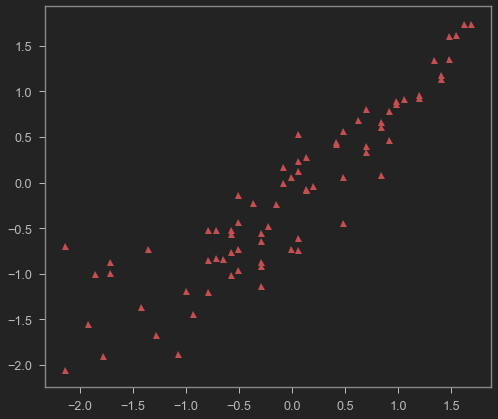

In [186]:
# plot y_test x y_predict
plt.plot(y_test, y_predict, '^', color = 'r')

In [189]:
# get original values (inverse of scaler)
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

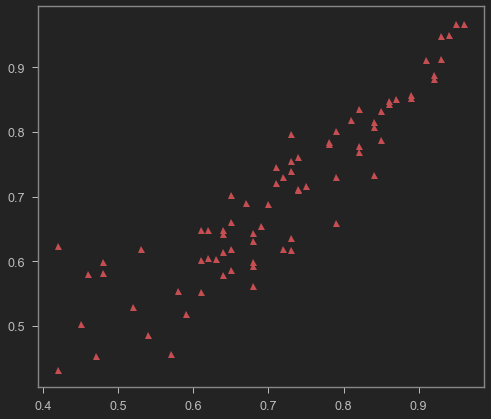

In [190]:
# plot with original values
plt.plot(y_test_orig, y_predict_orig, '^', color = 'r')

In [194]:
# get the length of test data (n) and no. of independent variables (k)
k = x_test.shape[1]
n = len(x_test)
n

75

In [195]:
# import libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

In [203]:
# calculate RMSE
RMSE = float(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)))

In [197]:
# calculate MSE
MSE = mean_squared_error(y_test_orig, y_predict_orig)

In [198]:
# calculate MAE
MAE = mean_absolute_error(y_test_orig, y_predict_orig)

In [199]:
# calculate R2 score
r2 = r2_score(y_test_orig, y_predict_orig)

In [200]:
# calculate adjusted R2 score
adj_r2 = 1 - (1 - r2)*(n - 1) / (n - k - 1)

In [204]:
# print errors
print('RMSE =', RMSE, '\nMSE =', MSE, '\nMAE =', MAE, '\nR square =', r2, '\nAdjusted R square =', adj_r2)

RMSE = 0.05857467471880446 
MSE = 0.0034309925184137506 
MAE = 0.04359252597839725 
R square = 0.8171136993579109 
Adjusted R square = 0.7980061754102299


In [230]:
# predict with custom inputs
new_predict = LinearRegression_model.predict(np.array([[340, 120, 1, 5.0, 5.0, 10.0, 1]]))
new_predict

array([[71.93029724]])

# ****THE END****